## Grand Challenge: RAVIR 
### Pipeline for multiclass classification. UNET with K-fold cross-validation, Dropout layers and Batch Normalization
#### Jonas Stylbäck & Miranda Gisudden

In [1]:
# External modules
%matplotlib inline
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K

# Local modules
sys.path.append("/tf/ravir-challenge/") # Root path, change accordingly
from utils import *
from models import *

In [2]:
# Data parameters
train_dir = '/tf/ravir-challenge/dataset/train'
test_dir = '/tf/ravir-challenge/dataset/test'
img_w, img_h, img_c = 768, 768, 1
batch_size = 1
val_ratio = 0.3

# Model parameters
base = 8
dropout_rate = 0.2
optimizer = Adam
learning_rate = 1e-4
epochs = 150
metric = [multi_dice_coef]
loss_func = multi_dice_coef_loss

global model_history
model_history = []

In [3]:
# Read data
image_list = get_file_list(train_dir, 'training_images')
mask_list = get_file_list(train_dir, 'training_masks')

In [4]:
# K-fold cross-validation

k = 3

for fold in range(k):
    K.clear_session()
    
    # Load images
    train_image_list, train_mask_list, \
    val_image_list, val_mask_list = get_train_val_list_k_fold(
            image_list, mask_list, 1/3, k, fold+1)
    
    x_train = load_as_multiclass(train_image_list, img_w, img_h, img_c, 'image')
    y_train = load_as_multiclass(train_mask_list, img_w, img_h, img_c, 'mask')
    x_val = load_as_multiclass(val_image_list, img_w, img_h, img_c, 'image')
    y_val = load_as_multiclass(val_mask_list, img_w, img_h, img_c, 'mask')
    
    # Load model
    model = get_unet_MC_DO_BN(base, img_w, img_h, img_c, dropout_rate)
    model_compile = model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss_func, metrics = metric)
    
    # Train model
    steps_per_epoch = x_train.shape[0]//batch_size
    train_generator = generator(x_train, y_train, batch_size)
    
    model_history.append(model.fit(
            train_generator, batch_size = batch_size, steps_per_epoch = steps_per_epoch,
            epochs = epochs, validation_steps = len(x_val), validation_data = (x_val, y_val),
            shuffle=False))
    
    if fold < 2:
        del train_image_list, train_mask_list, val_image_list, val_mask_list, x_train, y_train, x_val, y_val, model, model_compile

Model: "Multiclass_UNET_with_Dropout_BatchNorm"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 768, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 768, 768, 8)  80          ['input_layer[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 768, 768, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 384, 384, 8)  0       

                                )                                 'conv2d_3[0][0]']               
                                                                                                  
 dropout_6 (Dropout)            (None, 384, 384, 32  0           ['concatenate_2[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 384, 384, 16  4624        ['dropout_6[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 768, 768, 8)  1160       ['conv2d_12[0][0]']              
 spose)                                                                                           
          

Epoch 36/150
16/16 [==============================] - 1s 83ms/step - loss: -0.3478 - multi_dice_coef: 0.3478 - val_loss: -0.3514 - val_multi_dice_coef: 0.3514
Epoch 37/150
16/16 [==============================] - 1s 87ms/step - loss: -0.3421 - multi_dice_coef: 0.3421 - val_loss: -0.3559 - val_multi_dice_coef: 0.3559
Epoch 38/150
16/16 [==============================] - 1s 86ms/step - loss: -0.3461 - multi_dice_coef: 0.3461 - val_loss: -0.3592 - val_multi_dice_coef: 0.3592
Epoch 39/150
16/16 [==============================] - 1s 95ms/step - loss: -0.3500 - multi_dice_coef: 0.3500 - val_loss: -0.3659 - val_multi_dice_coef: 0.3659
Epoch 40/150
16/16 [==============================] - 1s 88ms/step - loss: -0.3544 - multi_dice_coef: 0.3544 - val_loss: -0.3727 - val_multi_dice_coef: 0.3727
Epoch 41/150
16/16 [==============================] - 1s 87ms/step - loss: -0.3521 - multi_dice_coef: 0.3521 - val_loss: -0.3747 - val_multi_dice_coef: 0.3747
Epoch 42/150
16/16 [==========================

16/16 [==============================] - 1s 92ms/step - loss: -0.3986 - multi_dice_coef: 0.3986 - val_loss: -0.3193 - val_multi_dice_coef: 0.3193
Epoch 88/150
16/16 [==============================] - 1s 89ms/step - loss: -0.3977 - multi_dice_coef: 0.3977 - val_loss: -0.2971 - val_multi_dice_coef: 0.2971
Epoch 89/150
16/16 [==============================] - 1s 86ms/step - loss: -0.4015 - multi_dice_coef: 0.4015 - val_loss: -0.3667 - val_multi_dice_coef: 0.3667
Epoch 90/150
16/16 [==============================] - 1s 88ms/step - loss: -0.4019 - multi_dice_coef: 0.4019 - val_loss: -0.3425 - val_multi_dice_coef: 0.3425
Epoch 91/150
16/16 [==============================] - 1s 86ms/step - loss: -0.3975 - multi_dice_coef: 0.3975 - val_loss: -0.3303 - val_multi_dice_coef: 0.3303
Epoch 92/150
16/16 [==============================] - 1s 88ms/step - loss: -0.4033 - multi_dice_coef: 0.4033 - val_loss: -0.3627 - val_multi_dice_coef: 0.3627
Epoch 93/150
16/16 [==============================] - 1s 82

16/16 [==============================] - 1s 87ms/step - loss: -0.4599 - multi_dice_coef: 0.4599 - val_loss: -0.4160 - val_multi_dice_coef: 0.4160
Epoch 139/150
16/16 [==============================] - 1s 92ms/step - loss: -0.4581 - multi_dice_coef: 0.4581 - val_loss: -0.3540 - val_multi_dice_coef: 0.3540
Epoch 140/150
16/16 [==============================] - 1s 82ms/step - loss: -0.4594 - multi_dice_coef: 0.4594 - val_loss: -0.3600 - val_multi_dice_coef: 0.3600
Epoch 141/150
16/16 [==============================] - 1s 89ms/step - loss: -0.4729 - multi_dice_coef: 0.4729 - val_loss: -0.3750 - val_multi_dice_coef: 0.3750
Epoch 142/150
16/16 [==============================] - 1s 87ms/step - loss: -0.4786 - multi_dice_coef: 0.4786 - val_loss: -0.4000 - val_multi_dice_coef: 0.4000
Epoch 143/150
16/16 [==============================] - 1s 97ms/step - loss: -0.4583 - multi_dice_coef: 0.4583 - val_loss: -0.2439 - val_multi_dice_coef: 0.2439
Epoch 144/150
16/16 [==============================] -

 spose)                         )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 192, 192, 32  128        ['conv2d_transpose_1[0][0]']     
 rmalization)                   )                                                                 
                                                                                                  
 concatenate_1 (Concatenate)    (None, 192, 192, 64  0           ['batch_normalization_1[0][0]',  
                                )                                 'conv2d_5[0][0]']               
                                                                                                  
 dropout_5 (Dropout)            (None, 192, 192, 64  0           ['concatenate_1[0][0]']          
                                )                                                                 
          

Epoch 23/150
15/15 [==============================] - 1s 88ms/step - loss: -0.2154 - multi_dice_coef: 0.2154 - val_loss: -0.0768 - val_multi_dice_coef: 0.0768
Epoch 24/150
15/15 [==============================] - 1s 89ms/step - loss: -0.2172 - multi_dice_coef: 0.2172 - val_loss: -0.0753 - val_multi_dice_coef: 0.0753
Epoch 25/150
15/15 [==============================] - 1s 90ms/step - loss: -0.2239 - multi_dice_coef: 0.2239 - val_loss: -0.0894 - val_multi_dice_coef: 0.0894
Epoch 26/150
15/15 [==============================] - 1s 90ms/step - loss: -0.2297 - multi_dice_coef: 0.2297 - val_loss: -0.0940 - val_multi_dice_coef: 0.0940
Epoch 27/150
15/15 [==============================] - 1s 93ms/step - loss: -0.2401 - multi_dice_coef: 0.2401 - val_loss: -0.0879 - val_multi_dice_coef: 0.0879
Epoch 28/150
15/15 [==============================] - 1s 97ms/step - loss: -0.2490 - multi_dice_coef: 0.2490 - val_loss: -0.1286 - val_multi_dice_coef: 0.1286
Epoch 29/150
15/15 [==========================

15/15 [==============================] - 1s 87ms/step - loss: -0.4073 - multi_dice_coef: 0.4073 - val_loss: -0.4451 - val_multi_dice_coef: 0.4451
Epoch 75/150
15/15 [==============================] - 1s 91ms/step - loss: -0.4109 - multi_dice_coef: 0.4109 - val_loss: -0.4403 - val_multi_dice_coef: 0.4403
Epoch 76/150
15/15 [==============================] - 1s 94ms/step - loss: -0.4248 - multi_dice_coef: 0.4248 - val_loss: -0.4437 - val_multi_dice_coef: 0.4437
Epoch 77/150
15/15 [==============================] - 1s 90ms/step - loss: -0.4179 - multi_dice_coef: 0.4179 - val_loss: -0.4528 - val_multi_dice_coef: 0.4528
Epoch 78/150
15/15 [==============================] - 1s 85ms/step - loss: -0.4072 - multi_dice_coef: 0.4072 - val_loss: -0.4500 - val_multi_dice_coef: 0.4500
Epoch 79/150
15/15 [==============================] - 1s 88ms/step - loss: -0.4165 - multi_dice_coef: 0.4165 - val_loss: -0.4531 - val_multi_dice_coef: 0.4531
Epoch 80/150
15/15 [==============================] - 1s 92

15/15 [==============================] - 1s 88ms/step - loss: -0.4527 - multi_dice_coef: 0.4527 - val_loss: -0.4956 - val_multi_dice_coef: 0.4956
Epoch 126/150
15/15 [==============================] - 1s 90ms/step - loss: -0.4580 - multi_dice_coef: 0.4580 - val_loss: -0.4874 - val_multi_dice_coef: 0.4874
Epoch 127/150
15/15 [==============================] - 1s 92ms/step - loss: -0.4674 - multi_dice_coef: 0.4674 - val_loss: -0.4900 - val_multi_dice_coef: 0.4900
Epoch 128/150
15/15 [==============================] - 1s 92ms/step - loss: -0.4655 - multi_dice_coef: 0.4655 - val_loss: -0.4832 - val_multi_dice_coef: 0.4832
Epoch 129/150
15/15 [==============================] - 1s 89ms/step - loss: -0.4639 - multi_dice_coef: 0.4639 - val_loss: -0.4891 - val_multi_dice_coef: 0.4891
Epoch 130/150
15/15 [==============================] - 1s 88ms/step - loss: -0.4621 - multi_dice_coef: 0.4621 - val_loss: -0.4885 - val_multi_dice_coef: 0.4885
Epoch 131/150
15/15 [==============================] -

                                                                                                  
 dropout_3 (Dropout)            (None, 48, 48, 64)   0           ['max_pooling2d_3[0][0]']        
                                                                                                  
 conv2d_8 (Conv2D)              (None, 48, 48, 128)  73856       ['dropout_3[0][0]']              
                                                                                                  
 conv2d_9 (Conv2D)              (None, 48, 48, 128)  147584      ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 96, 96, 64)  73792       ['conv2d_9[0][0]']               
 ose)                                                                                             
                                                                                                  
 batch_nor

Epoch 10/150
15/15 [==============================] - 1s 87ms/step - loss: -0.0969 - multi_dice_coef: 0.0969 - val_loss: -0.1192 - val_multi_dice_coef: 0.1192
Epoch 11/150
15/15 [==============================] - 1s 86ms/step - loss: -0.1014 - multi_dice_coef: 0.1014 - val_loss: -0.1164 - val_multi_dice_coef: 0.1164
Epoch 12/150
15/15 [==============================] - 1s 91ms/step - loss: -0.1104 - multi_dice_coef: 0.1104 - val_loss: -0.1129 - val_multi_dice_coef: 0.1129
Epoch 13/150
15/15 [==============================] - 1s 87ms/step - loss: -0.1152 - multi_dice_coef: 0.1152 - val_loss: -0.1089 - val_multi_dice_coef: 0.1089
Epoch 14/150
15/15 [==============================] - 1s 88ms/step - loss: -0.1199 - multi_dice_coef: 0.1199 - val_loss: -0.1039 - val_multi_dice_coef: 0.1039
Epoch 15/150
15/15 [==============================] - 1s 85ms/step - loss: -0.1303 - multi_dice_coef: 0.1303 - val_loss: -0.0990 - val_multi_dice_coef: 0.0990
Epoch 16/150
15/15 [==========================

15/15 [==============================] - 1s 89ms/step - loss: -0.4616 - multi_dice_coef: 0.4616 - val_loss: -0.2326 - val_multi_dice_coef: 0.2326
Epoch 62/150
15/15 [==============================] - 1s 95ms/step - loss: -0.4566 - multi_dice_coef: 0.4566 - val_loss: -0.2255 - val_multi_dice_coef: 0.2255
Epoch 63/150
15/15 [==============================] - 1s 91ms/step - loss: -0.4697 - multi_dice_coef: 0.4697 - val_loss: -0.2266 - val_multi_dice_coef: 0.2266
Epoch 64/150
15/15 [==============================] - 1s 90ms/step - loss: -0.4654 - multi_dice_coef: 0.4654 - val_loss: -0.2519 - val_multi_dice_coef: 0.2519
Epoch 65/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4731 - multi_dice_coef: 0.4731 - val_loss: -0.2309 - val_multi_dice_coef: 0.2309
Epoch 66/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4808 - multi_dice_coef: 0.4808 - val_loss: -0.2065 - val_multi_dice_coef: 0.2065
Epoch 67/150
15/15 [==============================] - 1s 91

15/15 [==============================] - 1s 87ms/step - loss: -0.5214 - multi_dice_coef: 0.5214 - val_loss: -0.2804 - val_multi_dice_coef: 0.2804
Epoch 113/150
15/15 [==============================] - 1s 88ms/step - loss: -0.5291 - multi_dice_coef: 0.5291 - val_loss: -0.3010 - val_multi_dice_coef: 0.3010
Epoch 114/150
15/15 [==============================] - 1s 87ms/step - loss: -0.5200 - multi_dice_coef: 0.5200 - val_loss: -0.3195 - val_multi_dice_coef: 0.3195
Epoch 115/150
15/15 [==============================] - 1s 90ms/step - loss: -0.5279 - multi_dice_coef: 0.5279 - val_loss: -0.2981 - val_multi_dice_coef: 0.2981
Epoch 116/150
15/15 [==============================] - 1s 87ms/step - loss: -0.5292 - multi_dice_coef: 0.5292 - val_loss: -0.2574 - val_multi_dice_coef: 0.2574
Epoch 117/150
15/15 [==============================] - 1s 89ms/step - loss: -0.5400 - multi_dice_coef: 0.5400 - val_loss: -0.2269 - val_multi_dice_coef: 0.2269
Epoch 118/150
15/15 [==============================] -

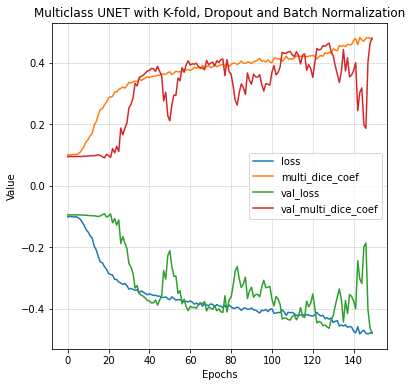

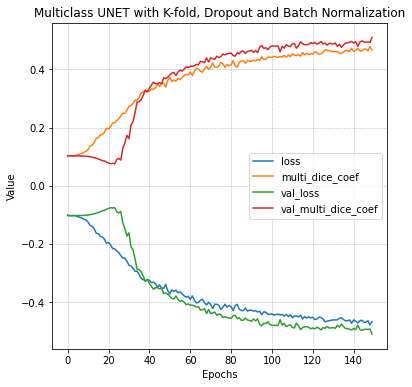

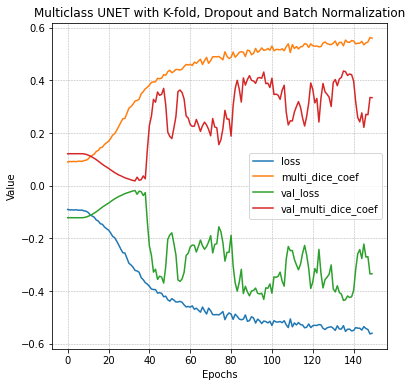

In [5]:
# Plot parameters
size_x = 6
size_y = 6
title = 'Multiclass UNET with K-fold, Dropout and Batch Normalization'
x_label = 'Epochs'
y_label = 'Value'
legend = True
print_keys = False

# Line plots of model history
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[0])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[1])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[2])

1/1 [==============================] - 2s 2s/step

Shape and Unique values of prediction :
 (768, 768, 3) 
 [0.0000000e+00 1.2655705e-38 1.2684802e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


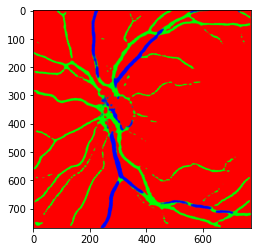

In [6]:
# Read and load test images for prediction
test_image_list = get_file_list(test_dir, '')
x_test = load_as_multiclass(test_image_list, img_w, img_h, img_c, 'image')

# Predict test images
predicted_mask_list = model.predict(x_test)

# Debugging information
get_image_information(predicted_mask_list, img_w, img_h, 'prediction', loaded = True)

1  out of  19  converted
2  out of  19  converted
3  out of  19  converted
4  out of  19  converted
5  out of  19  converted
6  out of  19  converted
7  out of  19  converted
8  out of  19  converted
9  out of  19  converted
10  out of  19  converted
11  out of  19  converted
12  out of  19  converted
13  out of  19  converted
14  out of  19  converted
15  out of  19  converted
16  out of  19  converted
17  out of  19  converted
18  out of  19  converted
19  out of  19  converted

Shape and Unique values of prediction mask :
 (768, 768) 
 [  0 128 255]


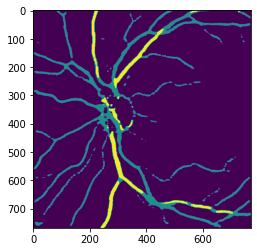

In [7]:
# Save predicted images to folder
save_multiclass_predictions(predicted_mask_list[0:len(predicted_mask_list)])

# Debugging information
prediction_list = get_file_list('/tf/ravir-challenge/predictions', '')
get_image_information(prediction_list, img_w, img_h, 'prediction mask', loaded = False)